In [2]:
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import torch
df= pd.read_excel('Data.xlsx')
T =df.iloc[:,0]
U =df.iloc[:,1]
x,y = map(np.array, [T,U])
u = np.array(U)
y = np.log(y)
U_0 =11.0514


In [5]:
b = np.log(U_0)
f_f = sum([(y_i-b)*x_i for y_i,x_i in zip(y,x) ])
f_l = sum([x_i**2 for x_i in x])
w = f_f/f_l
w

-7.023422232385714e-05

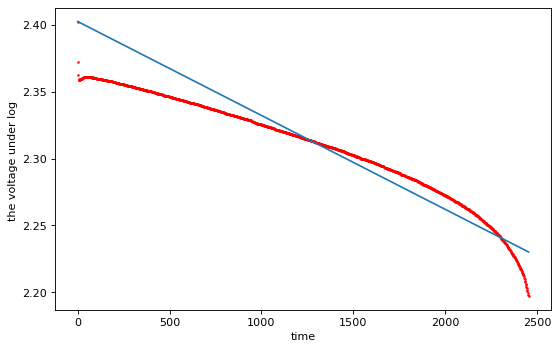

In [6]:
import matplotlib.pyplot as plt
y_hat = w*x+b
plt.figure(figsize=(8,5),dpi=80)
plt.xlabel("time")
plt.ylabel("the voltage under log ")
plt.scatter(x,y,c='red',s=2, alpha=0.8)
plt.plot(x,y_hat)

In [127]:

U_hat = U_0*(np.e**(w*x))

array([11.0514    , 11.04984774, 11.04829569, ...,  9.30436153,
        9.30305465,  9.30174796])

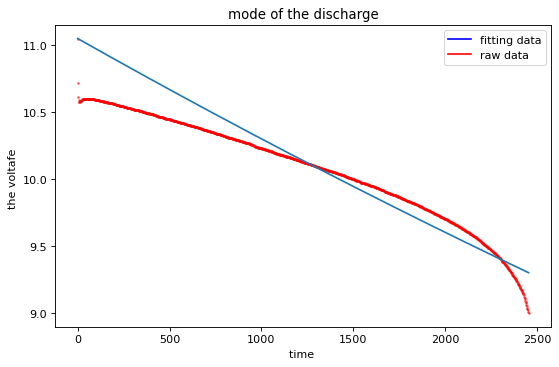

In [128]:
plt.figure(figsize=(8,5),dpi=80)
plt.xlabel("time ")
plt.ylabel("the voltafe ")
plt.title("mode of the discharge")
plt.scatter(x,u,c='red',marker='o',alpha=0.5,s =2)
blue_line =mlines.Line2D([],[],linestyle='-',color='blue',markersize=2,label= 'fitting data')
red_line = mlines.Line2D([],[],linestyle='-',color='red',markersize=2,label= 'raw data')
plt.legend(handles=[blue_line,red_line])
plt.plot(x,U_hat,linestyle='-')

#### 实际曲线

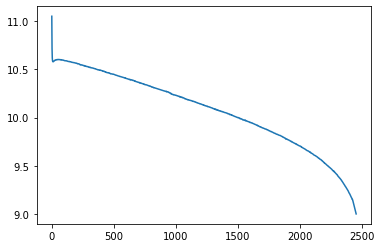

In [129]:
plt.plot(x,u,linestyle='-')

In [130]:
def improve_model(X,k1,a1,b1,k2,a2,b2):
   
   return torch.tensor([k1*np.e**(a1*(x-b1))+k2*np.e**(a2*(x-b2)**2) for x in X],
   requires_grad=True)
  # return k1*np.e**(a1*(x-2))+k2*np.e**(a2*(x-2250))+U_0*(np.e**(w*x))

In [215]:
def model3(x,a1,a2,a3):
    return 11.05+a1*x+a2*x+a2*x**2+a3*x**3
def model4(x,a0,a1,a2,a3,a4,a5):
    return a0*(a2*np.exp(-(x-a1)**2))+a3*(a4*np.exp(-(x-a5)**2))+9

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


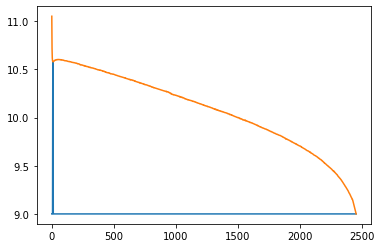

In [186]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(model4, x, u)
#a0,a1,a2 =popt
a0,a1,a2,a3,a4,a5 =popt
u_hat = model4(x,a0,a1,a2,a3,a4,a5)
plt.plot(x,u_hat,x,u)


In [131]:
import torch
from d2l import torch as d2l
from torch.utils import data
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = (
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


In [247]:
k1 = torch.tensor(8.05,requires_grad=True,dtype=torch.float)
a1 = torch.tensor(-0.05,requires_grad=True,dtype=torch.float)
b1 = torch.tensor(3.0,requires_grad=True,dtype=torch.float)
k2 = torch.tensor(2.02,requires_grad=True,dtype=torch.float)
a2 = torch.tensor(-1.4,requires_grad=True,dtype=torch.float)
b2=  torch.tensor(3.0,requires_grad=True,dtype=torch.float)
# print(model2(x[0:100],k1,a1,b1,k2,a2,b2))

K = torch.rand(1, 4, requires_grad=True, dtype=torch.double)
A = torch.rand(1, 4, requires_grad=True, dtype=torch.double)
B = torch.rand(1, 4, requires_grad=True, dtype=torch.double)

with torch.no_grad():
    K *= 20.0
    A *= 20.0
    B *= 0.1


def model2(X, k, a, b):
    ans = torch.sum( k * torch.exp(-a * (X - b) ** 2), 1)
    return ans


In [188]:
def SGD(params, lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr/batch_size
            param.grad.zero_()

In [138]:
def mse(out, yy):
    return (out - yy) ** 2

In [256]:
lr = 1e-3
batch_size = 10
xx = torch.tensor(x).unsqueeze(-1)
yy = torch.tensor(y)
num_epochs=200
for epoch in range(num_epochs):
    for (X, Y) in data_iter(batch_size, xx, yy):
        out = model2(X, K, A, B)
        loss = mse(out, Y)
        torch.sum(loss).backward()
        SGD([K, A, B], lr, batch_size)
    with torch.no_grad():
        train_l = mse(model2(X,K,A,B),Y)
        print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')



epoch 1,loss 5.380837
epoch 2,loss 5.339613
epoch 3,loss 5.322535
epoch 4,loss 5.301633
epoch 5,loss 5.430738
epoch 6,loss 5.292631
epoch 7,loss 5.407306
epoch 8,loss 5.392265
epoch 9,loss 5.334973
epoch 10,loss 5.303718
epoch 11,loss 5.351610
epoch 12,loss 5.319451
epoch 13,loss 5.252994
epoch 14,loss 5.326865
epoch 15,loss 5.194427
epoch 16,loss 5.393668
epoch 17,loss 5.204603
epoch 18,loss 5.266282
epoch 19,loss 5.308968
epoch 20,loss 5.277882
epoch 21,loss 5.223351
epoch 22,loss 5.388613
epoch 23,loss 5.325508
epoch 24,loss 5.422610
epoch 25,loss 5.406158
epoch 26,loss 5.335982
epoch 27,loss 5.416905
epoch 28,loss 5.291928
epoch 29,loss 5.342778
epoch 30,loss 5.311860
epoch 31,loss 5.288643
epoch 32,loss 5.288646
epoch 33,loss 5.226297
epoch 34,loss 5.415674
epoch 35,loss 5.303160
epoch 36,loss 5.403883
epoch 37,loss 5.284955
epoch 38,loss 5.429818
epoch 39,loss 5.291858
epoch 40,loss 5.309907
epoch 41,loss 5.332680
epoch 42,loss 5.348042
epoch 43,loss 5.445780
epoch 44,loss 5.4773

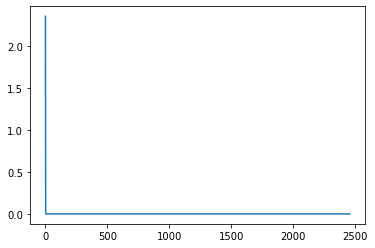

In [257]:
with torch.no_grad():   
    out = model2(xx,K,A,B)
x_1 = torch.tensor(x)
plt.plot(x_1,out)


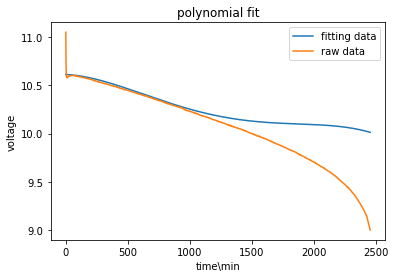

In [9]:
a0,a1,a2,a3,a4= 10.613,-6e-5,-7e-7,5e-10,-1e-13
x_3 = x
out = [a0+a1*x+a2*x**2+a3*x**3+a4*x**4 for x in x_3]
plt.xlabel("time\min")
plt.ylabel("voltage")
plt.title("polynomial fit")
line1,=plt.plot(x,out)
line2, =plt.plot(x,u)
plt.legend((line1,line2),["fitting data","raw data"])


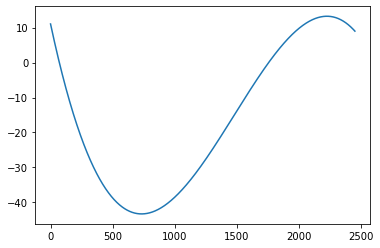

In [217]:
x_m = [0,2,2000,2454]
y_m = [11.0514,10.7179,9.7043,9.000]
popt2,pcov2=curve_fit(model3,x_m,y_m)
a1,a2,a3=popt2
out = [model3(x_n,a1,a2,a3) for x_n in x]
#out = model3(np.array(x_m),a0,a1,a2,a3)
plt.plot(x,out)

六次多项式

11.0514


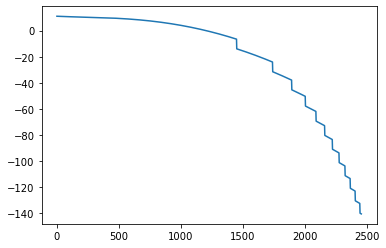

In [268]:
x_4 = x
out = [4e-19*x**6-3e-15*x**5+1e-11*x**4-2e-8*x**3+1e-5*x**2-0.0044*x+11.0514 for x in x_4]
print(out[0])
plt.plot(x,out)

In [283]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
def fourier(x, *args):
    t = np.arange(0, np.pi, np.pi/len(args)*2)
    w = 2 * np.pi / 200
    ret = 0
    for deg in range(0, int(len(args) / 2) + 1):
        ret += args[deg] * np.cos(deg * w * x) + args[len(args) - deg - 1] * np.sin(deg * w * x)
    return ret

In [293]:
def main(x, y, n):
    param_bounds=([-np.inf,0],[np.inf,1])
    try:
        popt, proc= curve_fit(fourier, x, y)
    except Exception as e:
        print(e)
        return
    plt.xlim(np.min(x) - np.abs(np.min(x) * 0.1), np.max(x) + np.abs(np.max(x) * 0.1))
    plt.ylim(np.min(y) - np.abs(np.min(y) * 0.1), np.max(y) + np.abs(np.max(y) * 0.1))
    # 默认坐标展示
    plt.plot(x, y, color='r', label='original')
    plt.plot(x, fourier(y, *popt), color='g', label='fitting-{n}'.format(n=n))
    plt.legend()
main(x,u,3)

Unable to determine number of fit parameters.
